#**Capítulo 1 - Pré-processamento de séries temporais**

In [7]:
url = 'https://raw.githubusercontent.com/allanspadini/livro-val-allan/main/GlobalLandTemperaturesByCountry.csv'

In [8]:
import pandas as pd

In [9]:
dados = pd.read_csv(url)

In [10]:
dados.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country'], dtype='object')

In [20]:
dados.columns = ['Data', 'Temperatura', 'Incerteza', 'País']

In [21]:
dados.head()

,Data,Temperatura,Incerteza,País
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [22]:
dados['Data'].max()

'2013-09-01'

In [23]:
dados_br = dados.query('País == "Brazil"')

In [24]:
dados_nulos = dados_br.isnull().sum()
dados_nulos

Data            0
Temperatura    17
Incerteza      17
País            0
dtype: int64

In [ ]:
dados_br.dropna(inplace=True)

In [26]:
dados_br['Temperatura'].describe()

count    2164.000000
mean       24.699256
std         0.978787
min        21.797000
25%        24.022500
50%        24.829500
75%        25.449750
max        27.151000
Name: Temperatura, dtype: float64

In [27]:
import seaborn as sns

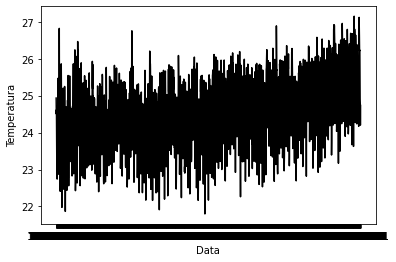

In [28]:
sns.lineplot(x='Data', y='Temperatura', data=dados_br, color='black')

In [ ]:
dados_br['Data'] = pd.to_datetime(dados_br['Data'], format='%Y-%m-%d')

Text(0, 0.5, 'Temperatura média')

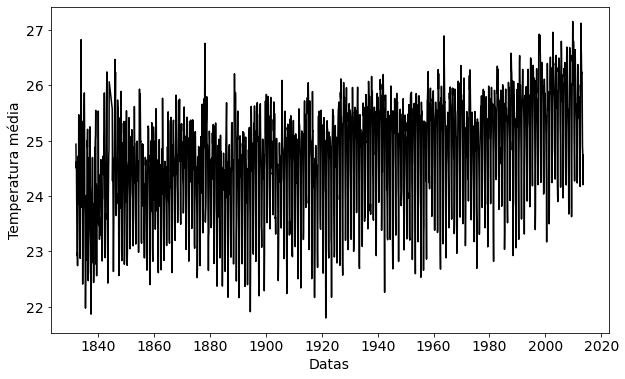

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6)) 
plt.rcParams['font.size'] = '14'
sns.lineplot(x='Data', y='Temperatura', data=dados_br, color='black')
plt.xlabel('Datas')
plt.ylabel('Temperatura média')

In [ ]:
dados_br['Mês'] = pd.DatetimeIndex(dados_br['Data']).month

In [35]:
temperatura = dados_br.groupby(['Mês']).mean()

Text(0, 0.5, 'Temperatura média')

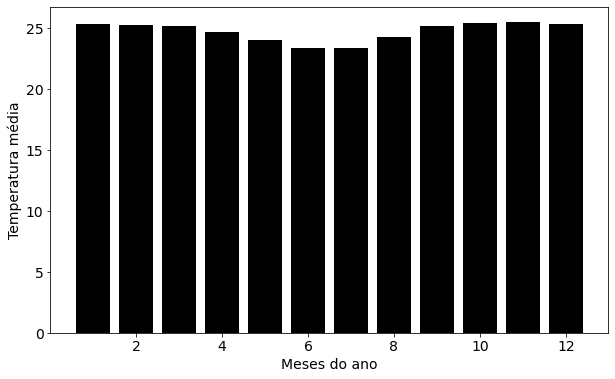

In [37]:
plt.figure(figsize=(10,6)) 
plt.rcParams['font.size'] = '14'
plt.bar(temperatura.index, temperatura['Temperatura'].values, color='k')
plt.xlabel('Meses do ano')
plt.ylabel('Temperatura média')

In [38]:
media_movel = dados_br['Temperatura'].rolling(30).mean()

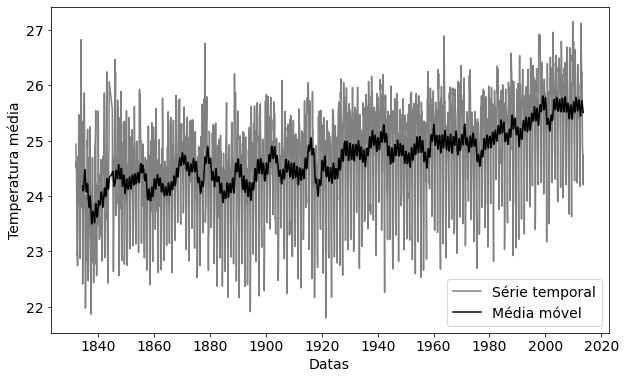

In [40]:
plt.figure(figsize=(10,6))
plt.rcParams['font.size'] = '14'

sns.lineplot(x='Data', y='Temperatura', data=dados_br, color='gray')
plt.xlabel('Datas')
plt.ylabel('Temperatura média')


sns.lineplot(x='Data', y=media_movel, data=dados_br, color='black')
plt.legend(labels=['Série temporal', 'Média móvel'])